In [289]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import hvplot.xarray
import hvplot
import cmocean

import matplotlib as mpl

hvplot.output(widget_location='bottom')

from helpers_mom6.collection_of_experiments import CollectionOfExperiments
from helpers_mom6.computational_tools import remesh, select_LatLon, Lk_error, x_coord, y_coord, gaussian_remesh
from helpers.plot_helpers import *
from helpers.cm26 import *
from helpers.ann_tools import *
from helpers.selectors import *

import warnings
warnings.filterwarnings("ignore")


%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Spectra

In [92]:
ds = read_datasets(['test'])

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-4
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-9
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-12
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-15


In [95]:
ann = import_ANN('/scratch/pp2681/mom6/CM26_ML_models/ocean3d/subfilter/FGR3/EXP1/model/Tall.nc')

In [184]:
%time dsp = ds['test-12'].predict_ANN(None, None, ann, gradient_features=['sh_xy', 'sh_xx', 'rel_vort'])

CPU times: user 56.7 s, sys: 988 ms, total: 57.7 s
Wall time: 59.9 s


Correlation: 0.6866406263652249
Relative Error: 0.8093732595443726
R2 =  0.4484431743621826
R2 max =  0.4713788628578186
Optinal scaling: 1.283008337020874
Nans [test/control]: [0, 0]


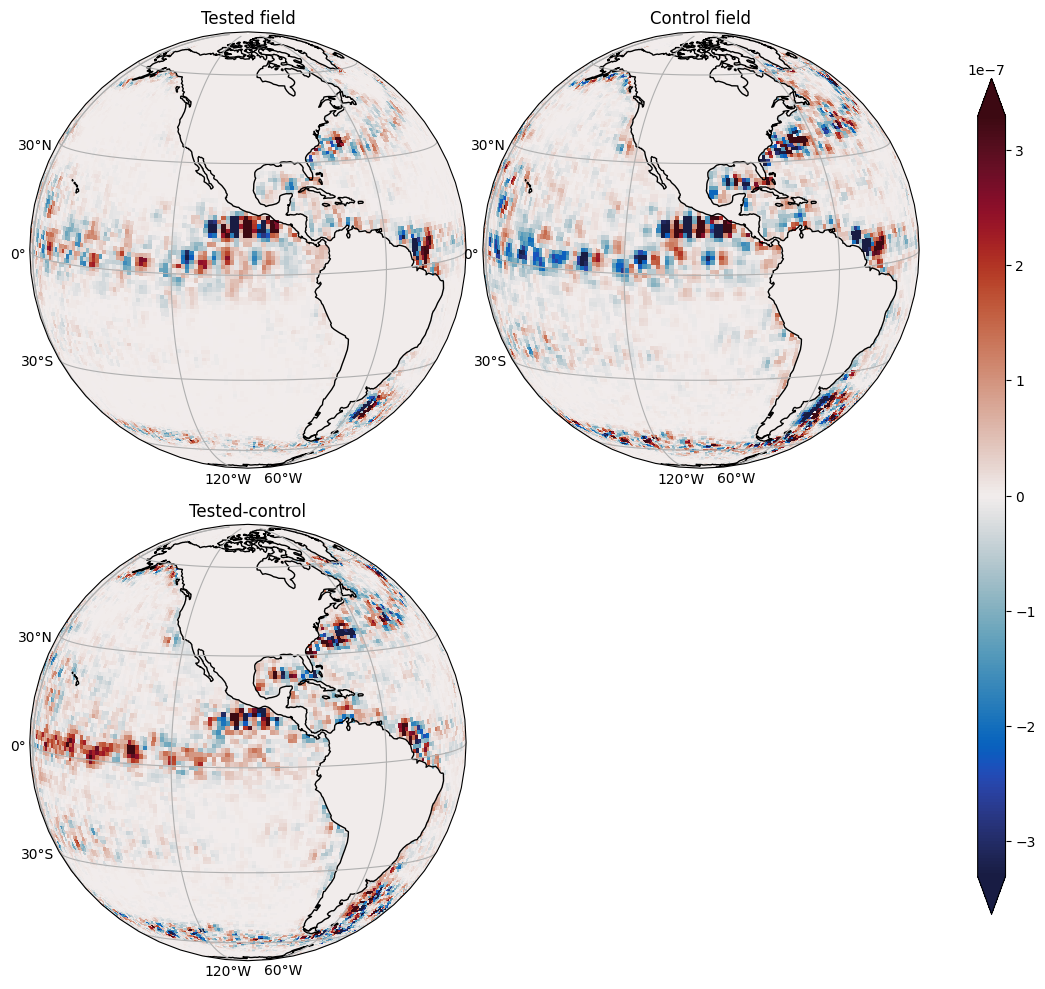

In [153]:
compare(dsp.data.ZB20u.isel(zl=0,time=0), dsp.data.SGSx.isel(zl=0,time=0), selector=select_globe)

In [170]:
param = dsp.param
data = dsp.data
grid = dsp.grid

areaT = param.dxT * param.dyT
areaU = param.dxCu * param.dyCu
areaV = param.dxCv * param.dyCv

Ex = data.SGSx * data.u
Ey = data.SGSy * data.v

Ex_ZB = data.ZB20u * data.u
Ey_ZB = data.ZB20v * data.v

dEdt = (grid.interp(Ex * areaU,'X') + grid.interp(Ey * areaV,'Y')) * param.wet / areaT

dEdt_ZB = (grid.interp(Ex_ZB * areaU,'X') + grid.interp(Ey_ZB * areaV,'Y')) * param.wet / areaT

dEdt_global = (dEdt * areaT).sum(['xh', 'yh'])
dEdt_ZB_global = (dEdt_ZB * areaT).sum(['xh', 'yh'])

dEdt_zonal = (dEdt * param.dxT).sum('xh').mean('time')
dEdt_ZB_zonal = (dEdt_ZB * param.dxT).sum('xh').mean('time')

Correlation: 0.5712653614534525
Relative Error: 0.798058796314448
R2 =  0.30647943766973695
R2 max =  0.3261647975185096
Optinal scaling: 0.802780464610891
Nans [test/control]: [0, 0]


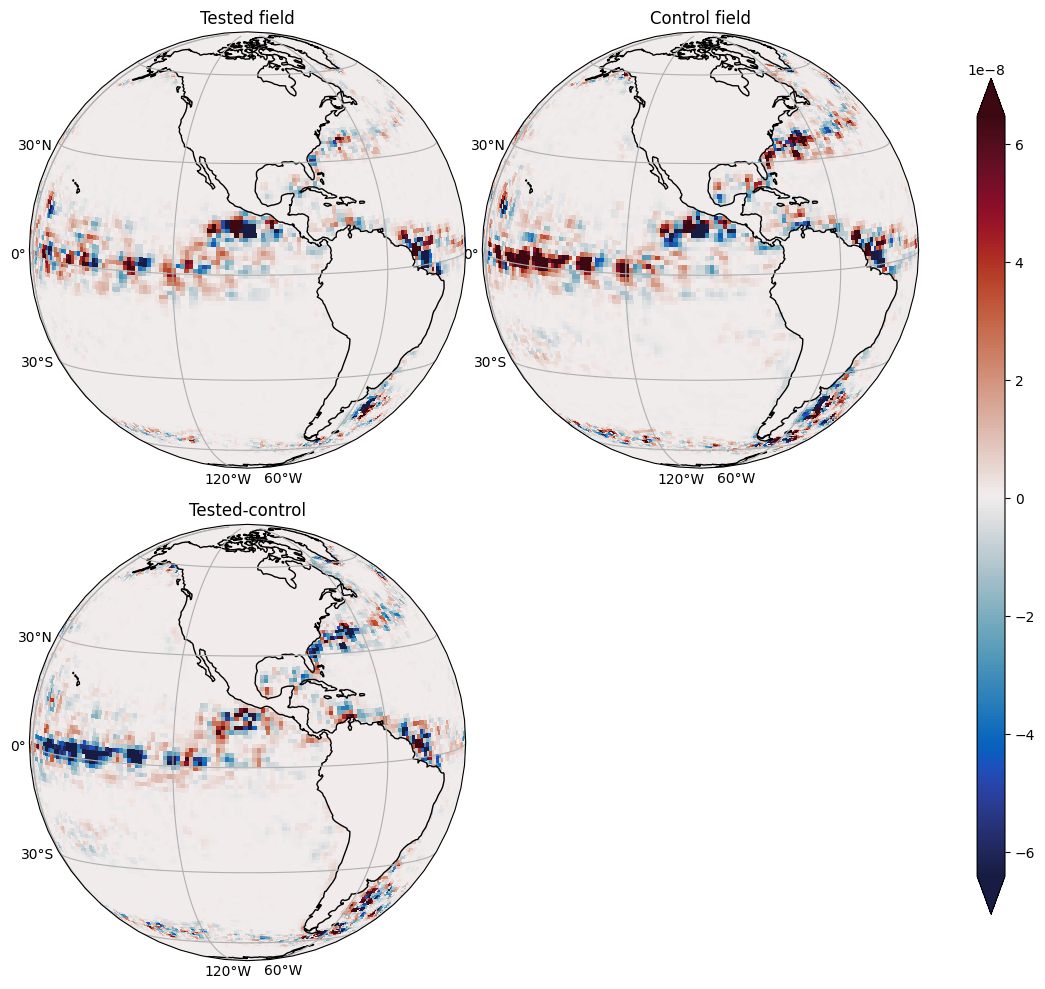

In [155]:
compare(dEdt_ZB.isel(zl=0,time=0), dEdt.isel(zl=0,time=0), selector=select_globe)

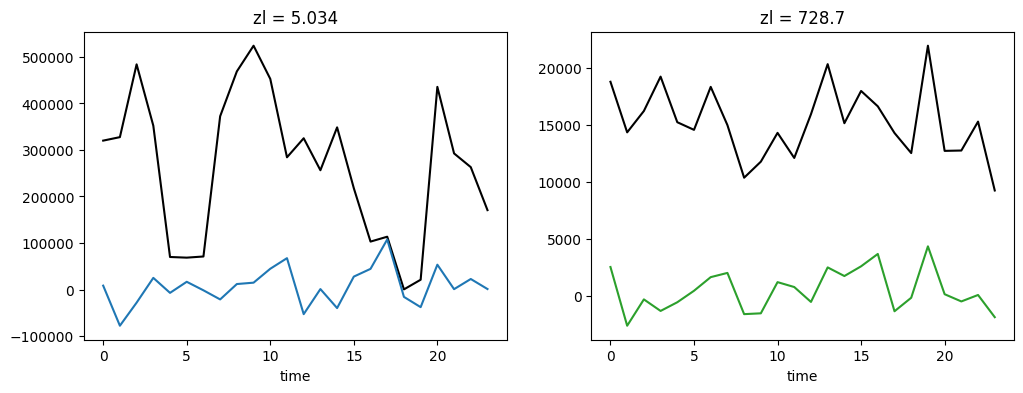

In [171]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
dEdt_global.isel(zl=0).plot(color='k')
dEdt_ZB_global.isel(zl=0).plot(color='tab:blue')

plt.subplot(1,2,2)
dEdt_global.isel(zl=5).plot(color='k')
dEdt_ZB_global.isel(zl=5).plot(color='tab:green')

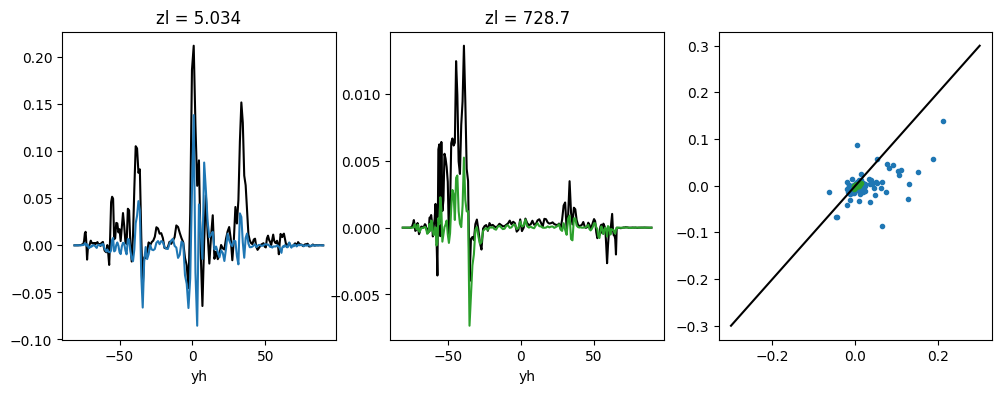

In [172]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
dEdt_zonal.isel(zl=0).plot(color='k')
dEdt_ZB_zonal.isel(zl=0).plot(color='tab:blue')

plt.subplot(1,3,2)
dEdt_zonal.isel(zl=5).plot(color='k')
dEdt_ZB_zonal.isel(zl=5).plot(color='tab:green')

plt.subplot(1,3,3)
plt.plot(dEdt_zonal.isel(zl=0), dEdt_ZB_zonal.isel(zl=0), '.',color='tab:blue')
plt.plot(dEdt_zonal.isel(zl=5), dEdt_ZB_zonal.isel(zl=5), '.',color='tab:green')
plt.plot([-0.3,0.3], [-0.3,0.3], color='k')

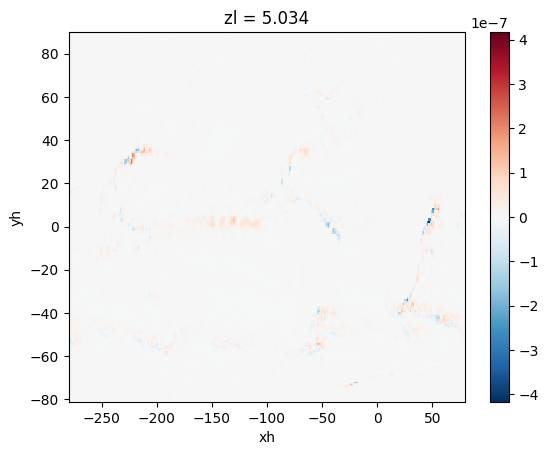

In [183]:
dEdt.mean('time').isel(zl=0).plot()

In [157]:
%time dsp = ds['test-4'].predict_ANN(None, None, ann, gradient_features=['sh_xy', 'sh_xx', 'rel_vort'])

CPU times: user 3min 2s, sys: 54.1 s, total: 3min 56s
Wall time: 4min 8s


In [161]:
param = dsp.param
data = dsp.data
grid = dsp.grid

areaT = param.dxT * param.dyT
areaU = param.dxCu * param.dyCu
areaV = param.dxCv * param.dyCv

Ex = data.SGSx * data.u
Ey = data.SGSy * data.v

Ex_ZB = data.ZB20u * data.u
Ey_ZB = data.ZB20v * data.v

dEdt = (grid.interp(Ex * areaU,'X') + grid.interp(Ey * areaV,'Y')) * param.wet / areaT

dEdt_ZB = (grid.interp(Ex_ZB * areaU,'X') + grid.interp(Ey_ZB * areaV,'Y')) * param.wet / areaT

dEdt_global = (dEdt * areaT).sum(['xh', 'yh'])
dEdt_ZB_global = (dEdt_ZB * areaT).sum(['xh', 'yh'])

dEdt_zonal = (dEdt * param.dxT).sum('xh').mean('time')
dEdt_ZB_zonal = (dEdt_ZB * param.dxT).sum('xh').mean('time')

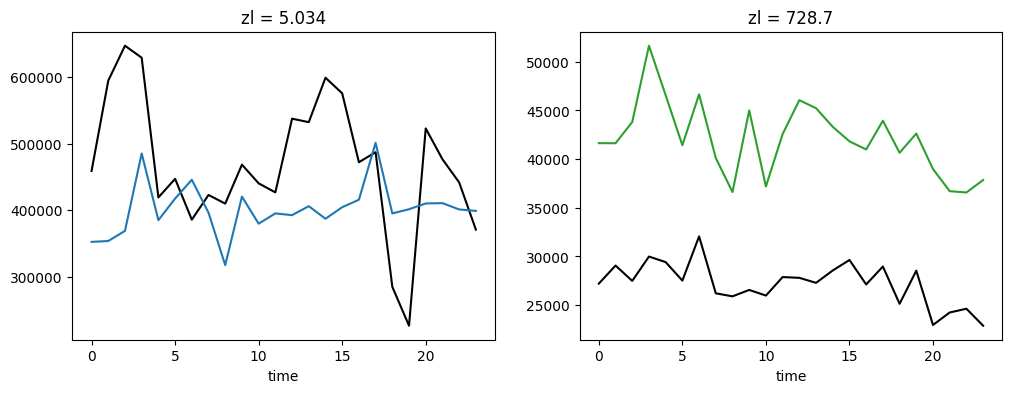

In [159]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
dEdt_global.isel(zl=0).plot(color='k')
dEdt_ZB_global.isel(zl=0).plot(color='tab:blue')

plt.subplot(1,2,2)
dEdt_global.isel(zl=5).plot(color='k')
dEdt_ZB_global.isel(zl=5).plot(color='tab:green')

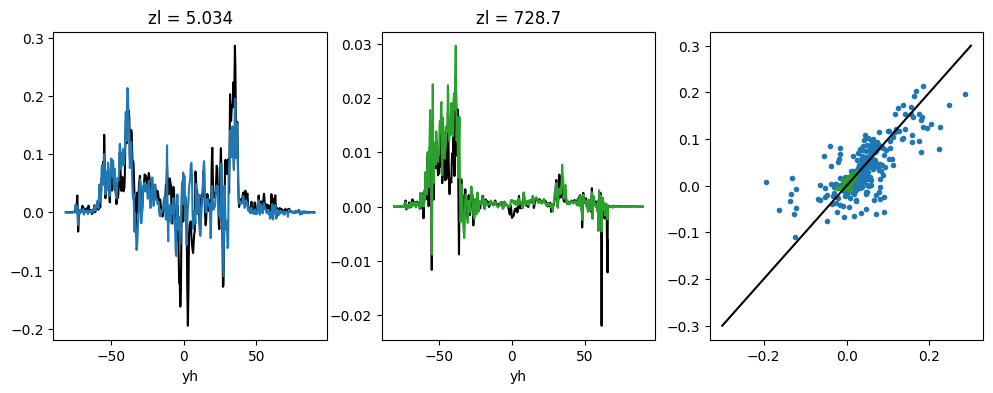

In [168]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
dEdt_zonal.isel(zl=0).plot(color='k')
dEdt_ZB_zonal.isel(zl=0).plot(color='tab:blue')

plt.subplot(1,3,2)
dEdt_zonal.isel(zl=5).plot(color='k')
dEdt_ZB_zonal.isel(zl=5).plot(color='tab:green')

plt.subplot(1,3,3)
plt.plot(dEdt_zonal.isel(zl=0), dEdt_ZB_zonal.isel(zl=0), '.',color='tab:blue')
plt.plot(dEdt_zonal.isel(zl=5), dEdt_ZB_zonal.isel(zl=5), '.',color='tab:green')
plt.plot([-0.3,0.3], [-0.3,0.3], color='k')

In [374]:
%time dsp = ds['test-15'].predict_ANN(None, None, ann, gradient_features=['sh_xy', 'sh_xx', 'rel_vort'])

CPU times: user 54.6 s, sys: 950 ms, total: 55.5 s
Wall time: 56.4 s


In [375]:
%time skill = dsp.SGS_skill()

CPU times: user 1min 4s, sys: 3.43 s, total: 1min 7s
Wall time: 1min 8s


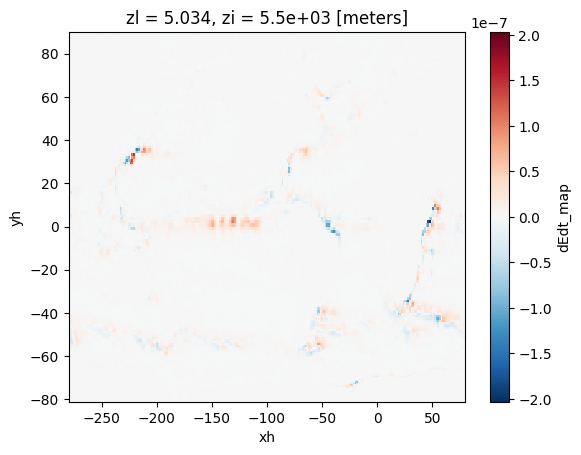

In [376]:
skill.dEdt_map.isel(zl=0).plot()

In [381]:
def propagate_mask(wet0, grid, niter=1):
    wet = wet0.copy()

    for iter in range(niter):
        wet = grid.interp(grid.interp(wet, ['X', 'Y']), ['X', 'Y'])
        wet = discard_land(wet, percentile=1)

    return wet

In [394]:
def propagate_mask_new(wet0, grid, niter=1):
    wet = wet0.copy()

    for iter in range(niter):
        wet = grid.interp(grid.interp(wet, ['X', 'Y']), ['X', 'Y'])

    return discard_land(wet, percentile=1)

In [382]:
wet = dsp.param.wet
grid = dsp.grid

Correlation: 0.3842853813102867
Relative Error: 0.5501247048377991
R2 =  0.4498752951622009
R2 max =  0.4498752951622009
Optinal scaling: 1.0
Nans [test/control]: [0, 0]


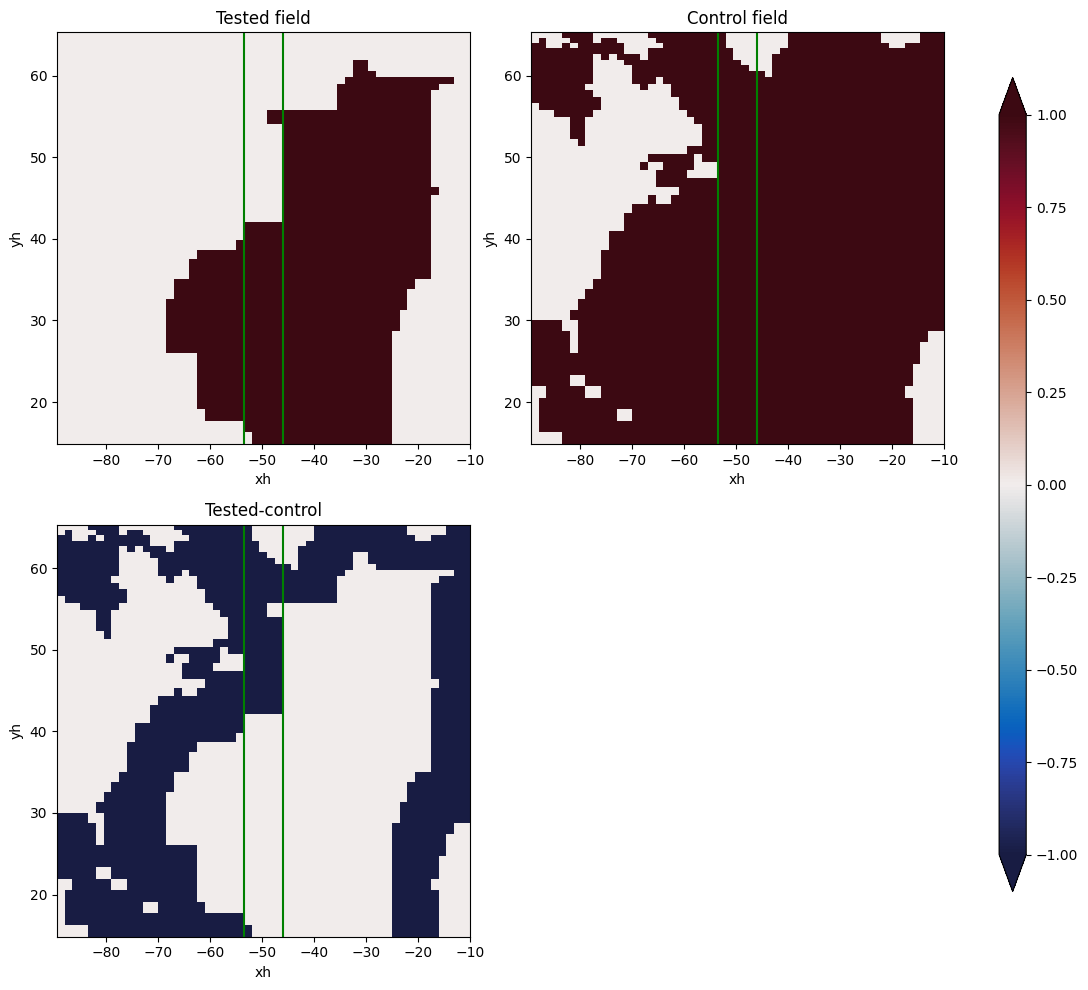

In [409]:
axes = compare(propagate_mask_new(wet,grid,5).isel(zl=0),wet.isel(zl=0), vmax=1, vmin=-1, selector=select_NA)
plt.sca(axes[0][1])
plt.axvline(x=-53.5, color='g')
plt.axvline(x=-53.5+5*1.5, color='g')

plt.sca(axes[0][0])
plt.axvline(x=-53.5, color='g')
plt.axvline(x=-53.5+5*1.5, color='g')

plt.sca(axes[1][0])
plt.axvline(x=-53.5, color='g')
plt.axvline(x=-53.5+5*1.5, color='g')

Text(0.5, 0.98, 'Stepping out 3 points from the coast')

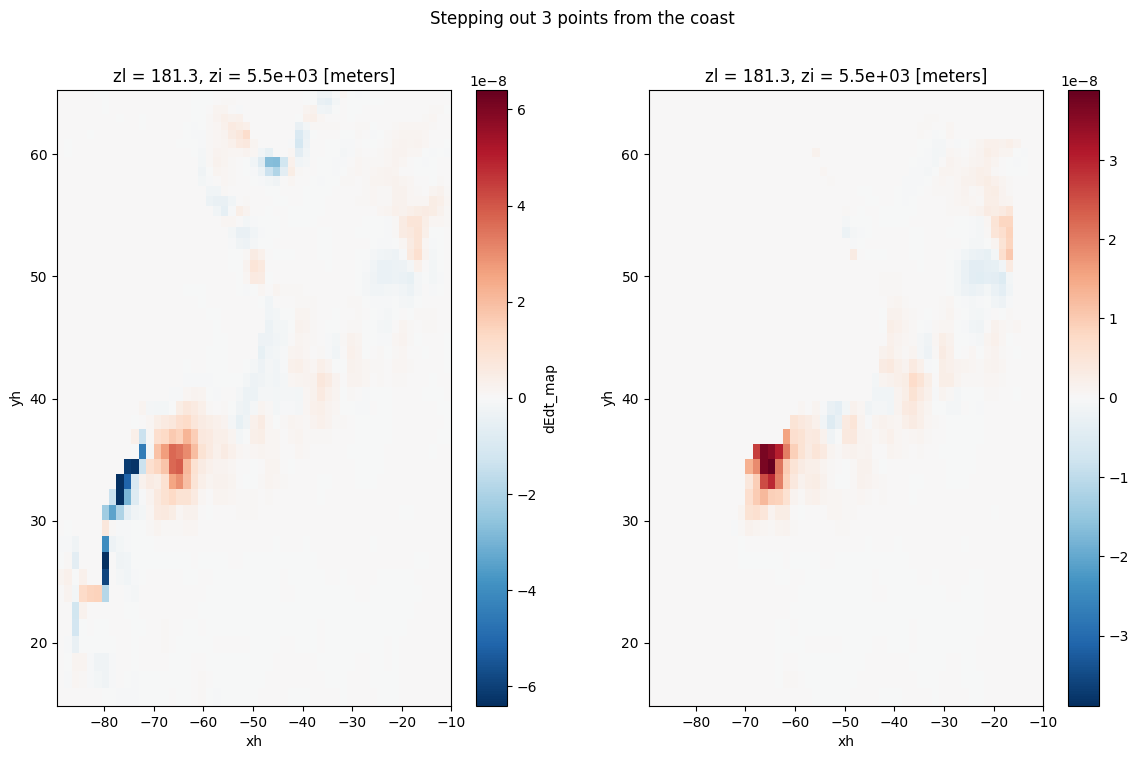

In [405]:
wet3 = propagate_mask(dsp.param.wet, dsp.grid, 3)

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
select_NA(skill.dEdt_map.isel(zl=3)).plot()

plt.subplot(1,2,2)
select_NA((skill.dEdt_map * wet3)).isel(zl=3).plot()

plt.suptitle('Stepping out 3 points from the coast')

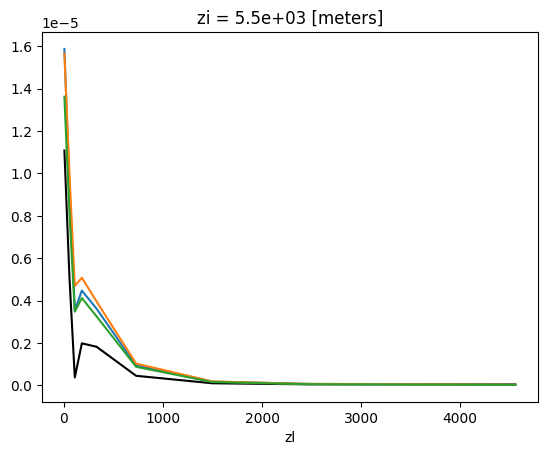

In [388]:
skill.dEdt_map.sum(['xh','yh']).plot(color='k')

wet3 = propagate_mask(dsp.param.wet, dsp.grid, 1)
(wet3 * skill.dEdt_map).sum(['xh','yh']).plot()

wet3 = propagate_mask(dsp.param.wet, dsp.grid, 2)
(wet3 * skill.dEdt_map).sum(['xh','yh']).plot()

wet3 = propagate_mask(dsp.param.wet, dsp.grid, 3)
(wet3 * skill.dEdt_map).sum(['xh','yh']).plot()

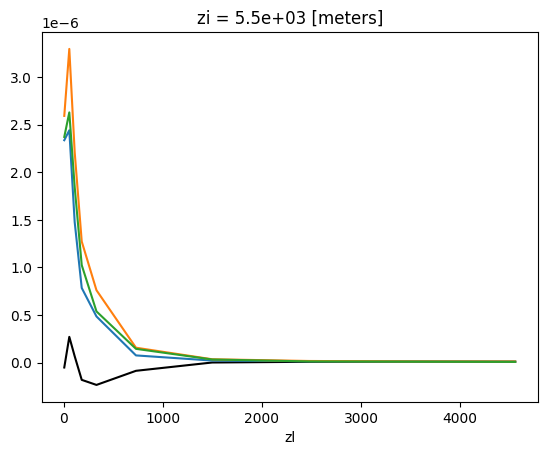

In [389]:
skill.dEdt_map_ZB.sum(['xh','yh']).plot(color='k')

wet3 = propagate_mask(dsp.param.wet, dsp.grid, 1)
(wet3 * skill.dEdt_map_ZB).sum(['xh','yh']).plot()

wet3 = propagate_mask(dsp.param.wet, dsp.grid, 2)
(wet3 * skill.dEdt_map_ZB).sum(['xh','yh']).plot()

wet3 = propagate_mask(dsp.param.wet, dsp.grid, 3)
(wet3 * skill.dEdt_map_ZB).sum(['xh','yh']).plot()

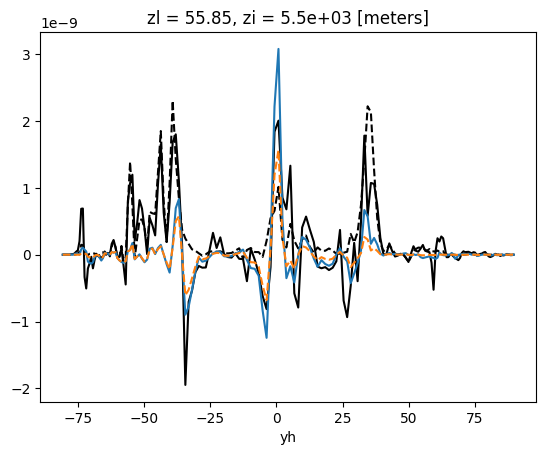

In [352]:
skill.dEdt_map.mean('xh').isel(zl=1).plot(color='k')
wet3 = propagate_mask(dsp.param.wet, dsp.grid, 3)
(wet3*skill.dEdt_map).mean('xh').isel(zl=1).plot(color='k', ls='--')
skill.dEdt_map_ZB.mean('xh').isel(zl=1).plot()
(wet3*skill.dEdt_map_ZB.mean('xh')).mean('xh').isel(zl=1).plot(ls='--')

In [396]:
wet3 = propagate_mask_new(dsp.param.wet, dsp.grid, 3)

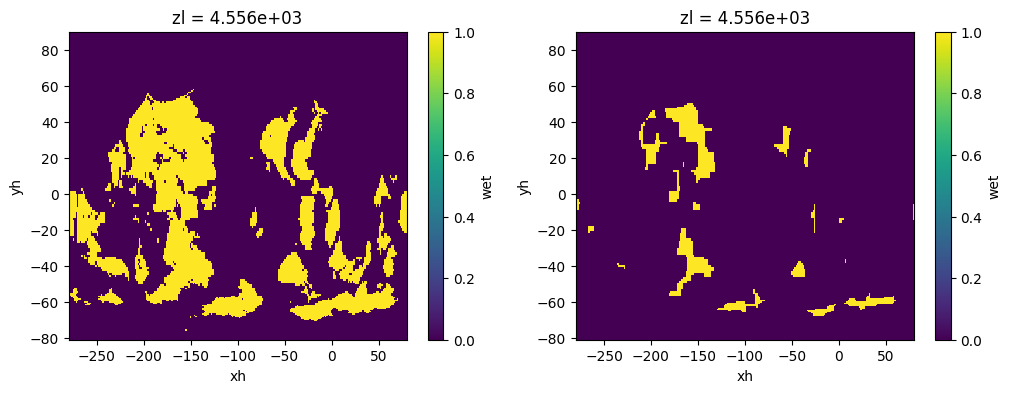

In [402]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
dsp.param.wet.isel(zl=-1).plot()
plt.subplot(1,2,2)
wet3.isel(zl=-1).plot()

In [407]:
np.abs(propagate_mask_new(dsp.param.wet, dsp.grid, 3) - propagate_mask(dsp.param.wet, dsp.grid, 3)).max()

<xarray.DataArray 'wet' ()>
array(0., dtype=float32)

In [410]:
from helpers.train_ann import train_ANN

In [411]:
train_ANN()

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-12
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-12
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-15
Factor: 12, depth: 0, MSE train/validate/perturbed/waves/short/trace: [1.552535, 1.940451, 0.000000, 0.000000, 0.000000, 0.000000]
Factor: 15, depth: 0, MSE train/validate/perturbed/waves/short/trace: [1.493537, 1.459590, 0.000000, 0.000000, 0.000000, 0.000000]
Iter/num_iters [1/10]. Iter time/Remaining time in seconds: [2.36/21.3]
Factor: 12, depth: 0, MSE train/validate/perturbed/waves/short/trace: [1.876229, 1.647875, 0.000000, 0.000000, 0.000000, 0.000000]
Factor: 15, depth: 0, MSE train/validate/perturbed/waves/short/trace: [1.429140, 1.671572, 0.000000, 0.000000, 0.000000, 0.000000]
Iter/num_iters [2/10]. Iter time/Remaining time in s

(ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=1, bias=True)
   )
 ),
 ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=2, bias=True)
   )
 ),
 None,
 <xarray.Dataset>
 Dimensions:             (factor: 2, depth: 1, iter: 10)
 Coordinates:
   * factor              (factor) int64 12 15
   * depth               (depth) int64 0
 Dimensions without coordinates: iter
 Data variables:
     MSE_train           (iter, factor, depth) float64 1.553 1.494 ... 1.309 1.19
     MSE_plain_waves     (iter, factor, depth) float64 0.0 0.0 0.0 ... 0.0 0.0
     MSE_short_zero      (iter, factor, depth) float64 0.0 0.0 0.0 ... 0.0 0.0
     MSE_jacobian_trace  (iter, factor, depth) float64 0.0 0.0 0.0 ... 0.0 0.0
     MSE_validate        (iter, factor, depth) float64 1.94 1.46 ... 1.339 1.185
     MSE_perturbed       (iter, factor, 

In [414]:
train_ANN(away_from_coast=3, time_iters=100)

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-12
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-12
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-15
Factor: 12, depth: 0, MSE train/validate/perturbed/waves/short/trace: [0.952259, 0.972494, 0.000000, 0.000000, 0.000000, 0.000000]
Factor: 15, depth: 0, MSE train/validate/perturbed/waves/short/trace: [0.757304, 0.592984, 0.000000, 0.000000, 0.000000, 0.000000]
Iter/num_iters [1/100]. Iter time/Remaining time in seconds: [1.35/133.9]
Factor: 12, depth: 0, MSE train/validate/perturbed/waves/short/trace: [1.147266, 0.802189, 0.000000, 0.000000, 0.000000, 0.000000]
Factor: 15, depth: 0, MSE train/validate/perturbed/waves/short/trace: [0.624525, 0.621530, 0.000000, 0.000000, 0.000000, 0.000000]
Iter/num_iters [2/100]. Iter time/Remaining time i


KeyboardInterrupt

